#Análise do dataset do 'Atlas Esgotos'

## Fonte

O Atlas Esgotos é o resultado de um trabalho conjunto, desenvolvido sob a coordenação da Agência Nacional de Águas (ANA) em parceria com a Secretaria Nacional de Saneamento Ambiental do Ministério das Cidades (SNSA/MCidades) e com a colaboração de instituições federais, estaduais e municipais de todo o Brasil. Trazendo o olhar da gestão dos recursos hídricos, reúne e apresenta informações, diagnósticos e propostas de soluções para todas as 5.570 sedes municipais do País, amparados na avaliação da situação da coleta e tratamento dos esgotos e do impacto do lançamento desses efluentes nos corpos hídricos, com uma visão sistêmica por bacia hidrográfica. As propostas de soluções foram elaboradas para o horizonte de 2035, com foco na proteção dos recursos hídricos, no seu uso sustentável para depuração de efluentes urbanos e na racionalização dos investimentos.

fonte: https://basedosdados.org/dataset/br-ana-atlas-esgotos

## Abertura do banco de dados

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio próprio/municipio.csv')

## Entedimento do dataset

In [4]:
dados.shape

(5570, 40)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sigla_uf                         5570 non-null   object 
 1   id_municipio                     5570 non-null   int64  
 2   populacao_urbana_2013            5570 non-null   int64  
 3   populacao_urbana_2035            5570 non-null   int64  
 4   prestador_servico_esgoto         5570 non-null   object 
 5   sigla_prestador                  5570 non-null   object 
 6   indice_sem_atend                 5570 non-null   float64
 7   indice_atend_solucao_ind         5570 non-null   float64
 8   indice_atend_col_sem_trat        5570 non-null   float64
 9   indice_atend_col_trat            5570 non-null   float64
 10  vazao_sem_col_sem_trat           5570 non-null   float64
 11  vazao_solucao_ind                5570 non-null   float64
 12  vazao_col_sem_trat  

## Visualização dos dados

In [6]:
dados.head()

,sigla_uf,id_municipio,populacao_urbana_2013,populacao_urbana_2035,prestador_servico_esgoto,sigla_prestador,indice_sem_atend,indice_atend_solucao_ind,indice_atend_col_sem_trat,indice_atend_col_trat,vazao_sem_col_sem_trat,vazao_solucao_ind,vazao_col_sem_trat,vazao_col_trat,vazao_total,parcela_carga_sem_col_sem_trat,parcela_carga_solucao_ind,parcela_carga_col_sem_trat,parcela_carga_col_trat,carga_gerada,carga_lancada_sem_col_sem_trat,carga_lancada_solucao_ind,carga_lancada_col_sem_trat,carga_lancada_col_trat,carga_lancada,indice_atend_etes_avaliado_2035,indice_atend_solucao_ind_2035,carga_gerada_2035,carga_afluente_ete_2035,carga_efluente_ete_2035,carga_afluente_solucao_ind_2035,carga_efluente_solucao_ind_2035,populacao_atendida_2035,investimento_col,investimento_trat,investimento_col_trat,necessidade_remocao_dbo,tipologia_solucao,atencao_fosforo,atencao_nitrogenio
0,RO,1100015,14735,15507,Serviço Autônomo de Água e Esgoto,SAAE,96.7,1.9,1.4,0.0,14.6,0.3,0.2,0.0,15.1,769.7,14.7,11.3,0.0,795.7,769.7,5.9,11.3,0.0,786.9,90.0,10.0,837.4,753.7,75.4,83.7,33.5,13956,1.686679e+07,4298529.94,2.116532e+07,Acima de 80%,Tratamento secundário avançado,Não,Não
1,RO,1100023,85770,121503,Companhia de Águas e Esgotos de Rondônia,CAERD,89.4,8.6,2.0,0.0,125.7,12.1,2.8,0.0,140.6,4140.9,397.2,93.4,0.0,4631.6,4140.9,158.9,93.4,0.0,4393.2,90.0,10.0,6561.2,5905.1,2362.0,656.1,262.4,109353,1.194605e+08,25041739.67,1.445022e+08,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
2,RO,1100031,2771,3349,Prefeitura Municipal de Cabixi,PM,99.0,0.6,0.4,0.0,4.3,0.0,0.0,0.0,4.3,148.1,0.9,0.6,0.0,149.6,148.1,0.4,0.6,0.0,149.1,90.0,10.0,180.8,162.7,65.1,18.1,7.2,3014,4.860356e+06,690255.84,5.550611e+06,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
3,RO,1100049,67665,80311,Serviço Autônomo de Água e Esgoto de Cacoal,SAAE,28.8,16.2,0.0,55.0,30.2,17.0,0.0,57.6,104.8,1053.1,591.2,0.0,2009.7,3653.9,1053.1,236.5,0.0,502.4,1792.0,90.0,10.0,4336.8,3903.1,975.8,433.7,173.5,72280,3.892141e+07,4891916.80,4.381333e+07,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
4,RO,1100056,15276,14254,Prefeitura Municipal de Cerejeiras,PM,79.6,19.7,0.7,0.0,17.4,4.3,0.1,0.0,21.8,656.9,162.4,5.5,0.0,824.9,656.9,65.0,5.5,0.0,727.5,90.0,10.0,769.7,692.7,69.3,77.0,30.8,12829,1.562341e+07,3951303.59,1.957471e+07,Acima de 80%,Tratamento secundário avançado,Não,Não


## Distribuição da população, por estado

In [59]:
populacao_por_estado = dados.groupby('sigla_uf')['populacao_urbana_2013'].sum()
classificado = populacao_por_estado.sort_values(ascending=False)

Text(0.5, 1.0, '% População brasileira, por estado')

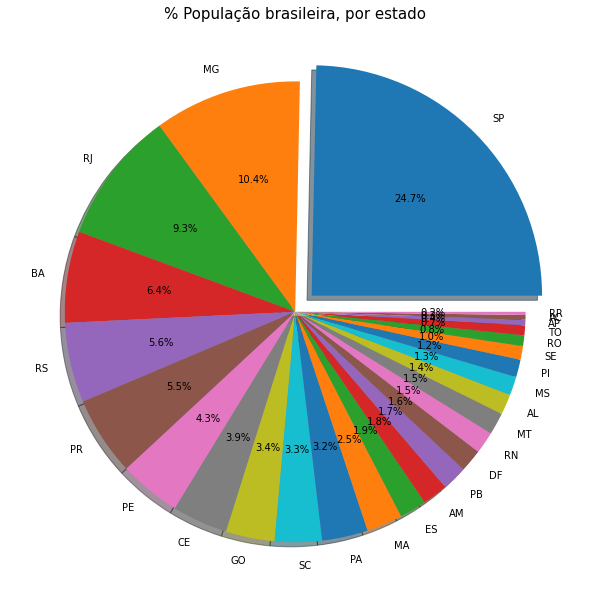

In [66]:
fig = plt.figure(figsize=(10,8))
eixo = fig.add_axes([0,0,1,1])

explodir = [0.1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

eixo.pie(classificado, labels=classificado.index, autopct='%.1f%%', explode=explodir, shadow=True)
eixo.set_title('% População brasileira, por estado', fontsize=15, pad=5)

## Análise da variável 'indice_sem_atend'

In [7]:
dados['indice_sem_atend'].mean()

46.60660682226223

Text(0, 0.5, '% índice sem coleta & tratamento')

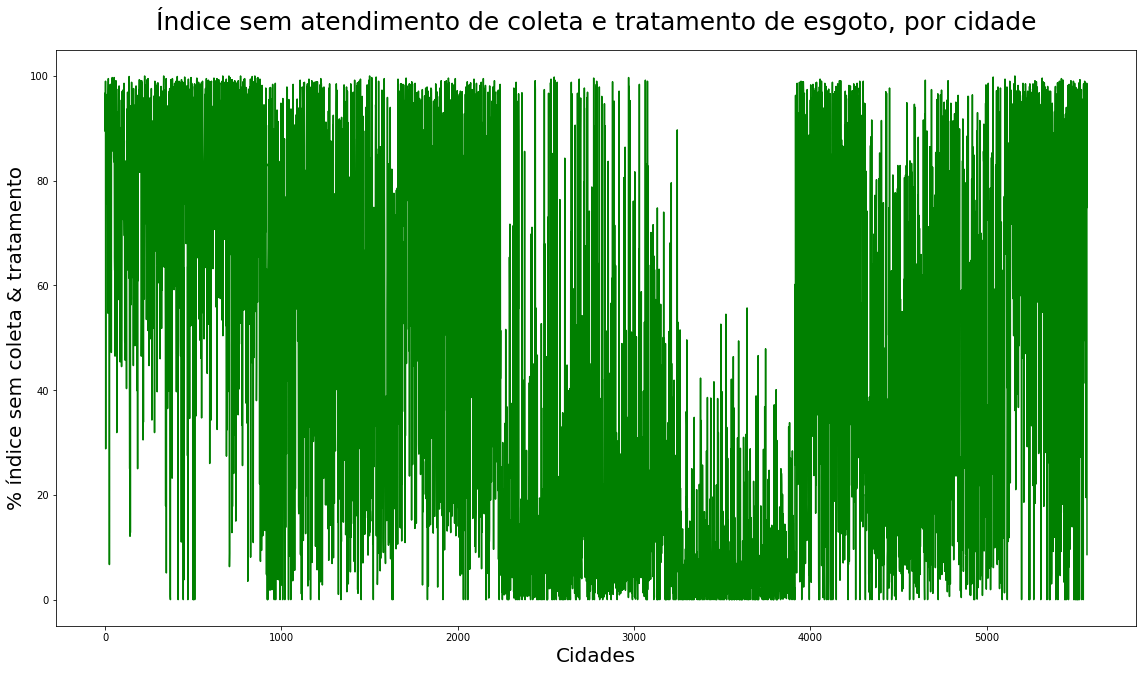

In [71]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(dados['indice_sem_atend'], color = 'g')
eixo.set_title('Índice sem atendimento de coleta e tratamento de esgoto, por cidade', fontsize=25, pad=20)
eixo.set_xlabel('Cidades', fontsize=20)
eixo.set_ylabel('% índice sem coleta & tratamento', fontsize=20)

In [9]:
dados['indice_sem_atend'].describe()

count    5570.000000
mean       46.606607
std        35.555621
min         0.000000
25%        11.225000
50%        42.800000
75%        82.700000
max       100.000000
Name: indice_sem_atend, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


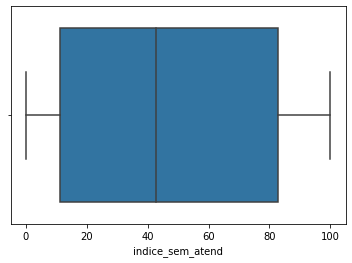

In [10]:
import seaborn as sns

sns.boxplot(dados['indice_sem_atend'])

In [11]:
dados.query("indice_sem_atend==0")['indice_sem_atend']

370     0.0
414     0.0
443     0.0
469     0.0
499     0.0
       ... 
5516    0.0
5521    0.0
5526    0.0
5539    0.0
5548    0.0
Name: indice_sem_atend, Length: 255, dtype: float64

In [12]:
dados.query("indice_sem_atend==100")['indice_sem_atend']

224     100.0
332     100.0
667     100.0
702     100.0
768     100.0
849     100.0
1500    100.0
5160    100.0
Name: indice_sem_atend, dtype: float64

## Análise da variável 'indice_atend_col_trat'

In [13]:
dados.query("indice_atend_col_trat==0")['indice_atend_col_trat']

0       0.0
1       0.0
2       0.0
4       0.0
5       0.0
       ... 
5564    0.0
5565    0.0
5566    0.0
5567    0.0
5568    0.0
Name: indice_atend_col_trat, Length: 3738, dtype: float64

In [14]:
dados.query("indice_atend_col_trat==100")['indice_atend_col_trat']

992     100.0
1117    100.0
1165    100.0
1214    100.0
1337    100.0
        ...  
5494    100.0
5501    100.0
5510    100.0
5526    100.0
5539    100.0
Name: indice_atend_col_trat, Length: 81, dtype: float64

## Análise da variável 'vazao_sem_col_sem_trat' e 'vazao_total'

In [15]:
dados['vazao_sem_col_sem_trat'].sum()

83154.50000000001

In [16]:
dados['vazao_total'].sum()

304697.0

## A realidade de cada unidade da federação

In [73]:
medias_sem_esgoto = dados.groupby("sigla_uf").mean()['indice_sem_atend']
medias_sem_esgoto.sort_values(ascending=False)

sigla_uf
RO    86.921154
MA    81.403687
PA    80.250000
AP    78.287500
AM    77.035484
MT    76.610638
PI    76.551786
AC    76.309091
TO    73.582734
AL    73.383333
MS    72.230380
RN    65.441317
SE    63.913333
RR    63.400000
GO    63.182927
PR    58.432080
BA    58.005755
CE    55.811957
PB    53.141704
PE    44.048649
RS    41.970423
SC    32.973220
ES    25.055128
MG    20.838101
RJ    19.848913
DF     8.600000
SP     7.199070
Name: indice_sem_atend, dtype: float64

## Em busca de outliers na vazão total de esgoto

In [18]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

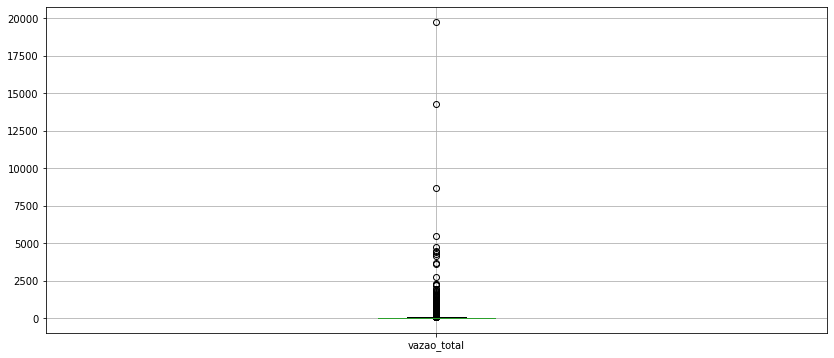

In [19]:
dados.boxplot(['vazao_total'])

In [20]:
dados['vazao_total'].describe()

count     5570.000000
mean        54.703232
std        411.031269
min          0.200000
25%          3.400000
50%          7.600000
75%         20.900000
max      19783.700000
Name: vazao_total, dtype: float64

In [21]:
valor = dados['vazao_total']

In [22]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [23]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

## Boxplot sem os outliers

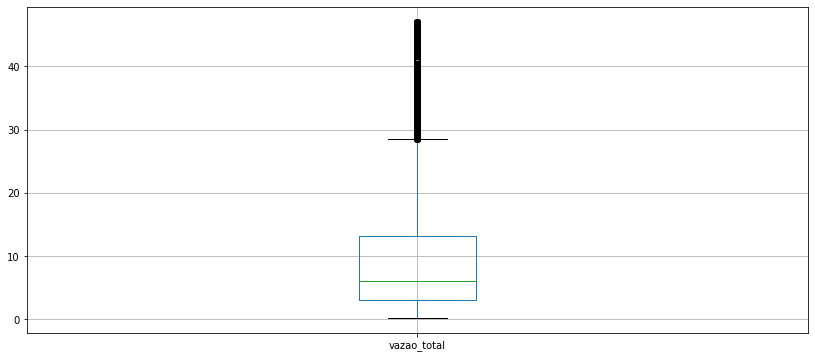

In [24]:
dados_new.boxplot(['vazao_total'])

## Histogramas com e sem outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c7ea5950>]],
      dtype=object)

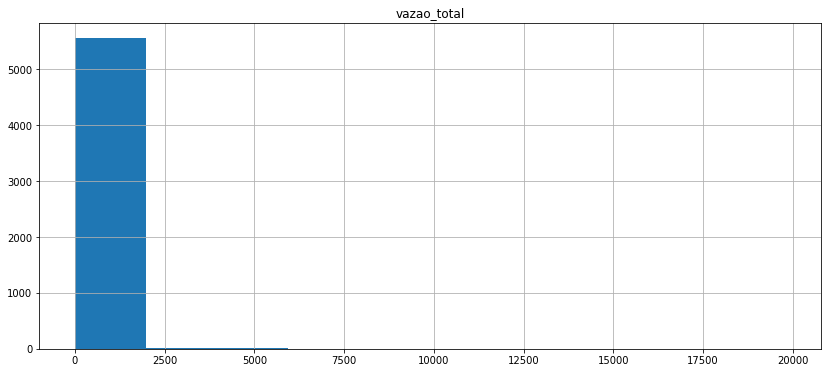

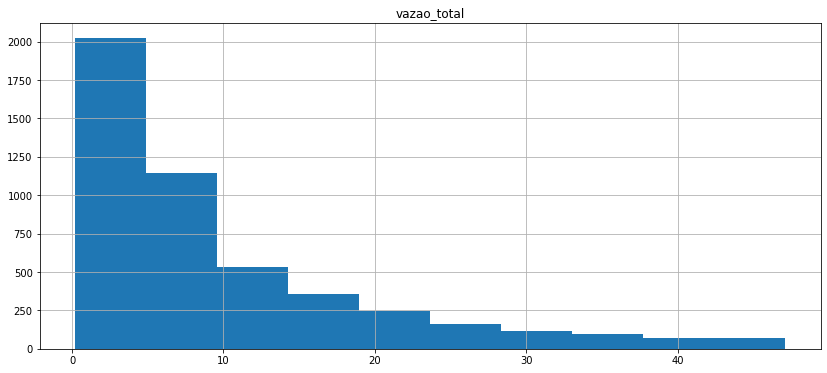

In [25]:
dados.hist(['vazao_total'])
dados_new.hist(['vazao_total'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


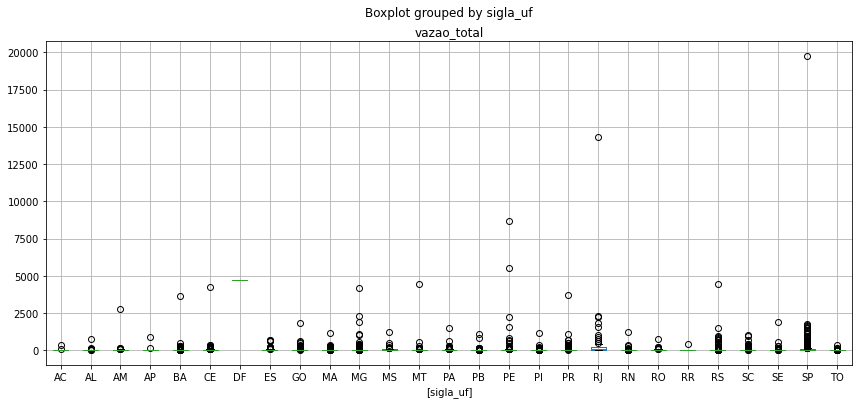

In [26]:
dados.boxplot(['vazao_total'], by = ['sigla_uf'])

In [27]:
grupo_tipo = dados.groupby('sigla_uf')['vazao_total']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [28]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

## Boxplot por estado, sem outliers

In [29]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['sigla_uf'] == tipo
    eh_dentro_limite = (dados['vazao_total'] >= limite_inferior[tipo]) & (dados['vazao_total'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


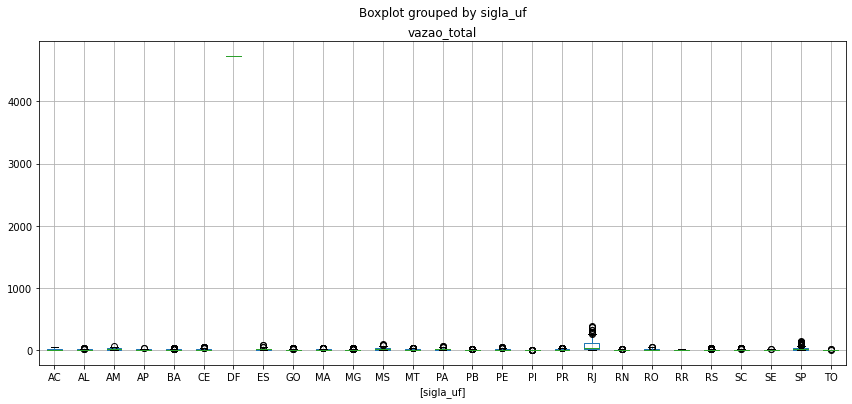

In [30]:
dados_new.boxplot(['vazao_total'], by = ['sigla_uf'])

In [31]:
list(dados['sigla_uf'].drop_duplicates())

['RO',
 'AC',
 'AM',
 'RR',
 'PA',
 'AP',
 'TO',
 'MA',
 'PI',
 'CE',
 'RN',
 'PB',
 'PE',
 'AL',
 'SE',
 'BA',
 'MG',
 'ES',
 'RJ',
 'SP',
 'PR',
 'SC',
 'RS',
 'MS',
 'MT',
 'GO',
 'DF']

## Segregando o estado de São Paulo, para maior entendimento

In [32]:
estado = ['SP']

In [33]:
selecao = dados['sigla_uf'].isin(estado)
selecao

0       False
1       False
2       False
3       False
4       False
        ...  
5565    False
5566    False
5567    False
5568    False
5569    False
Name: sigla_uf, Length: 5570, dtype: bool

In [34]:
dados_sp = dados[selecao]

In [35]:
dados_sp.head()

,sigla_uf,id_municipio,populacao_urbana_2013,populacao_urbana_2035,prestador_servico_esgoto,sigla_prestador,indice_sem_atend,indice_atend_solucao_ind,indice_atend_col_sem_trat,indice_atend_col_trat,vazao_sem_col_sem_trat,vazao_solucao_ind,vazao_col_sem_trat,vazao_col_trat,vazao_total,parcela_carga_sem_col_sem_trat,parcela_carga_solucao_ind,parcela_carga_col_sem_trat,parcela_carga_col_trat,carga_gerada,carga_lancada_sem_col_sem_trat,carga_lancada_solucao_ind,carga_lancada_col_sem_trat,carga_lancada_col_trat,carga_lancada,indice_atend_etes_avaliado_2035,indice_atend_solucao_ind_2035,carga_gerada_2035,carga_afluente_ete_2035,carga_efluente_ete_2035,carga_afluente_solucao_ind_2035,carga_efluente_solucao_ind_2035,populacao_atendida_2035,investimento_col,investimento_trat,investimento_col_trat,necessidade_remocao_dbo,tipologia_solucao,atencao_fosforo,atencao_nitrogenio
3267,SP,3500105,33041,32181,Companhia de Saneamento Básico do Estado de Sã...,SABESP,0.6,0.2,0.0,99.2,0.2,0.1,0.0,34.5,34.8,11.4,3.0,0.0,1750.3,1764.7,11.4,1.2,0.0,455.1,467.7,100.0,0.0,1737.8,1737.8,173.8,0.0,0.0,32181,302631.35,9209620.67,9512252.02,Acima de 80%,Tratamento secundário avançado,Não,Não
3268,SP,3500204,3274,3033,Companhia de Saneamento Básico do Estado de Sã...,SABESP,1.2,3.7,0.0,95.2,0.1,0.2,0.0,5.8,6.0,2.1,6.5,0.0,170.3,178.9,2.1,2.6,0.0,42.6,47.3,100.0,0.0,163.8,163.8,32.8,0.0,0.0,3033,235137.53,0.00,235137.53,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
3269,SP,3500303,30841,39498,Prefeitura Municipal de Aguaí,PM,0.6,0.6,98.8,0.0,0.4,0.4,67.7,0.0,68.5,10.0,10.3,1645.0,0.0,1665.4,10.0,4.1,1645.0,0.0,1659.2,90.0,10.0,2132.9,1919.6,192.0,213.3,85.3,35548,9842023.54,10790594.34,20632617.88,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
3270,SP,3500402,7091,7352,Companhia de Saneamento Básico do Estado de Sã...,SABESP,9.1,3.9,4.4,82.6,1.0,0.4,0.5,9.3,11.2,37.0,15.9,18.0,335.8,406.8,37.0,6.3,18.0,84.0,145.4,100.0,0.0,397.0,397.0,83.0,0.0,0.0,7352,1165604.70,254463.95,1420068.65,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
3271,SP,3500501,17945,19297,Serviço Autônomo de Água e Esgoto de Águas de ...,SAAE,0.0,4.0,67.2,28.8,0.0,1.9,32.4,13.9,48.2,0.0,37.3,626.5,268.5,932.4,0.0,14.9,626.5,26.9,668.3,100.0,0.0,1042.0,1042.0,53.9,0.0,0.0,19297,3320664.35,6137966.68,9458631.03,Acima de 80%,Tratamento secundário avançado,Sim,Não


In [36]:
list(dados_sp['id_municipio'].drop_duplicates())

[3500105,
 3500204,
 3500303,
 3500402,
 3500501,
 3500550,
 3500600,
 3500709,
 3500758,
 3500808,
 3500907,
 3501004,
 3501103,
 3501152,
 3501202,
 3501301,
 3501400,
 3501509,
 3501608,
 3501707,
 3501806,
 3501905,
 3502002,
 3502101,
 3502200,
 3502309,
 3502408,
 3502507,
 3502606,
 3502705,
 3502754,
 3502804,
 3502903,
 3503000,
 3503109,
 3503158,
 3503208,
 3503307,
 3503356,
 3503406,
 3503505,
 3503604,
 3503703,
 3503802,
 3503901,
 3503950,
 3504008,
 3504107,
 3504206,
 3504305,
 3504404,
 3504503,
 3504602,
 3504701,
 3504800,
 3504909,
 3505005,
 3505104,
 3505203,
 3505302,
 3505351,
 3505401,
 3505500,
 3505609,
 3505708,
 3505807,
 3505906,
 3506003,
 3506102,
 3506201,
 3506300,
 3506359,
 3506409,
 3506508,
 3506607,
 3506706,
 3506805,
 3506904,
 3507001,
 3507100,
 3507159,
 3507209,
 3507308,
 3507407,
 3507456,
 3507506,
 3507605,
 3507704,
 3507753,
 3507803,
 3507902,
 3508009,
 3508108,
 3508207,
 3508306,
 3508405,
 3508504,
 3508603,
 3508702,
 3508801,


In [37]:
dados_sp.shape[0]

645

In [38]:
dados_sp.index = range(dados_sp.shape[0])

In [39]:
dados_sp

,sigla_uf,id_municipio,populacao_urbana_2013,populacao_urbana_2035,prestador_servico_esgoto,sigla_prestador,indice_sem_atend,indice_atend_solucao_ind,indice_atend_col_sem_trat,indice_atend_col_trat,vazao_sem_col_sem_trat,vazao_solucao_ind,vazao_col_sem_trat,vazao_col_trat,vazao_total,parcela_carga_sem_col_sem_trat,parcela_carga_solucao_ind,parcela_carga_col_sem_trat,parcela_carga_col_trat,carga_gerada,carga_lancada_sem_col_sem_trat,carga_lancada_solucao_ind,carga_lancada_col_sem_trat,carga_lancada_col_trat,carga_lancada,indice_atend_etes_avaliado_2035,indice_atend_solucao_ind_2035,carga_gerada_2035,carga_afluente_ete_2035,carga_efluente_ete_2035,carga_afluente_solucao_ind_2035,carga_efluente_solucao_ind_2035,populacao_atendida_2035,investimento_col,investimento_trat,investimento_col_trat,necessidade_remocao_dbo,tipologia_solucao,atencao_fosforo,atencao_nitrogenio
0,SP,3500105,33041,32181,Companhia de Saneamento Básico do Estado de Sã...,SABESP,0.6,0.2,0.0,99.2,0.2,0.1,0.0,34.5,34.8,11.4,3.0,0.0,1750.3,1764.7,11.4,1.2,0.0,455.1,467.7,100.0,0.0,1737.8,1737.8,173.8,0.0,0.0,32181,302631.35,9209620.67,9512252.02,Acima de 80%,Tratamento secundário avançado,Não,Não
1,SP,3500204,3274,3033,Companhia de Saneamento Básico do Estado de Sã...,SABESP,1.2,3.7,0.0,95.2,0.1,0.2,0.0,5.8,6.0,2.1,6.5,0.0,170.3,178.9,2.1,2.6,0.0,42.6,47.3,100.0,0.0,163.8,163.8,32.8,0.0,0.0,3033,235137.53,0.00,235137.53,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
2,SP,3500303,30841,39498,Prefeitura Municipal de Aguaí,PM,0.6,0.6,98.8,0.0,0.4,0.4,67.7,0.0,68.5,10.0,10.3,1645.0,0.0,1665.4,10.0,4.1,1645.0,0.0,1659.2,90.0,10.0,2132.9,1919.6,192.0,213.3,85.3,35548,9842023.54,10790594.34,20632617.88,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
3,SP,3500402,7091,7352,Companhia de Saneamento Básico do Estado de Sã...,SABESP,9.1,3.9,4.4,82.6,1.0,0.4,0.5,9.3,11.2,37.0,15.9,18.0,335.8,406.8,37.0,6.3,18.0,84.0,145.4,100.0,0.0,397.0,397.0,83.0,0.0,0.0,7352,1165604.70,254463.95,1420068.65,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
4,SP,3500501,17945,19297,Serviço Autônomo de Água e Esgoto de Águas de ...,SAAE,0.0,4.0,67.2,28.8,0.0,1.9,32.4,13.9,48.2,0.0,37.3,626.5,268.5,932.4,0.0,14.9,626.5,26.9,668.3,100.0,0.0,1042.0,1042.0,53.9,0.0,0.0,19297,3320664.35,6137966.68,9458631.03,Acima de 80%,Tratamento secundário avançado,Sim,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,SP,3557006,111177,122318,Águas de Votorantim (SANEAMENTO AMBIENTAL ÁGUA...,AV (SAAB),1.1,0.9,9.8,88.2,2.8,2.2,24.2,218.0,247.2,63.7,49.4,553.9,4984.7,5651.6,63.7,19.7,553.9,1051.8,1689.1,100.0,0.0,6605.2,6605.2,1114.9,0.0,0.0,122318,21569380.56,7220180.82,28789561.38,Solução conjunta,Solução conjunta,Sim,Não
641,SP,3557105,87201,106706,Superintendência de Água e Esgoto de Votuporanga,SAEV,0.0,0.0,0.0,100.0,0.0,0.0,0.0,173.3,173.3,0.0,0.0,0.0,4445.2,4445.2,0.0,0.0,0.0,1108.7,1108.7,100.0,0.0,5762.1,5762.1,589.4,0.0,0.0,106706,26630166.88,28765779.34,55395946.22,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
642,SP,3557154,1973,2442,Companhia de Saneamento Básico do Estado de Sã...,SABESP,9.2,2.6,0.0,88.2,0.4,0.1,0.0,3.4,3.9,9.9,2.8,0.0,95.5,108.3,9.9,1.1,0.0,22.0,33.0,100.0,0.0,131.9,131.9,26.4,0.0,0.0,2442,1083553.46,111720.42,1195273.88,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
643,SP,3557204,11476,11312,Serviço Autônomo de Água e Esgoto de Chavantes,SAEC,1.9,0.1,0.0,98.0,0.4,0.0,0.0,19.3,19.7,11.9,0.4,0.0,607.3,619.7,11.9,0.2,0.0,75.3,87.4,98.0,2.0,610.8,598.6,41.9,12.2,4.9,11086,0.00,3259355.73,3259355.73,Acima de 80%,Tratamento secundário avançado,Não,Não


## Realidade do tratamento de esgoto, por população

In [40]:
dados_sp.sort_values(by = ['populacao_urbana_2013'], inplace = True)
dados_sp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sigla_uf,id_municipio,populacao_urbana_2013,populacao_urbana_2035,prestador_servico_esgoto,sigla_prestador,indice_sem_atend,indice_atend_solucao_ind,indice_atend_col_sem_trat,indice_atend_col_trat,vazao_sem_col_sem_trat,vazao_solucao_ind,vazao_col_sem_trat,vazao_col_trat,vazao_total,parcela_carga_sem_col_sem_trat,parcela_carga_solucao_ind,parcela_carga_col_sem_trat,parcela_carga_col_trat,carga_gerada,carga_lancada_sem_col_sem_trat,carga_lancada_solucao_ind,carga_lancada_col_sem_trat,carga_lancada_col_trat,carga_lancada,indice_atend_etes_avaliado_2035,indice_atend_solucao_ind_2035,carga_gerada_2035,carga_afluente_ete_2035,carga_efluente_ete_2035,carga_afluente_solucao_ind_2035,carga_efluente_solucao_ind_2035,populacao_atendida_2035,investimento_col,investimento_trat,investimento_col_trat,necessidade_remocao_dbo,tipologia_solucao,atencao_fosforo,atencao_nitrogenio
81,SP,3507209,650,615,Companhia de Saneamento Básico do Estado de Sã...,SABESP,0.6,0.0,0.0,99.4,0.0,0.0,0.0,1.1,1.1,0.3,0.0,0.0,41.7,42.0,0.3,0.0,0.0,10.4,10.7,100.0,0.0,33.2,33.2,8.3,0.0,0.0,615,6.367520e+03,0.000000e+00,6.367520e+03,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
370,SP,3532868,792,1170,Prefeitura Municipal de Nova Castilho,PM,0.8,0.0,0.0,99.2,0.0,0.0,0.0,1.7,1.8,0.3,0.0,0.0,42.4,42.8,0.3,0.0,0.0,8.5,8.8,99.2,0.8,63.2,62.7,12.5,0.5,0.2,1161,6.039429e+05,6.226988e+04,6.662127e+05,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
532,SP,3547650,855,1161,Companhia de Saneamento Básico do Estado de Sã...,SABESP,8.0,0.0,0.0,92.0,0.1,0.0,0.0,1.6,1.8,4.3,0.0,0.0,49.4,53.7,4.3,0.0,0.0,32.1,36.4,100.0,0.0,62.7,62.7,6.3,0.0,0.0,1161,3.956678e+05,4.332810e+05,8.289487e+05,Acima de 80%,Tratamento secundário avançado,Não,Não
369,SP,3532843,869,1066,Companhia de Saneamento Básico do Estado de Sã...,SABESP,31.6,0.0,0.0,68.4,0.8,0.0,0.0,1.7,2.4,22.4,0.0,0.0,48.6,71.0,22.4,0.0,0.0,9.7,32.2,100.0,0.0,57.6,57.6,11.5,0.0,0.0,1066,5.425977e+05,2.768290e+04,5.702806e+05,Entre 60 e 80%,Tratamento secundário convencional,Não,Não
467,SP,3541653,893,1095,Companhia de Saneamento Básico do Estado de Sã...,SABESP,28.7,3.1,0.0,68.2,0.6,0.1,0.0,1.4,2.1,13.8,1.5,0.0,32.7,48.0,13.8,0.6,0.0,7.2,21.6,95.0,5.0,59.1,56.1,12.4,3.0,1.2,1040,6.985469e+05,1.336351e+05,8.321819e+05,Entre 60 e 80%,Tratamento secundário convencional,Sim,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,SP,3547809,704942,709730,Serviço Municipal de Saneamento Ambiental de S...,SEMASA,1.9,2.1,55.7,40.3,17.1,18.7,498.5,361.0,895.3,730.2,798.2,21275.9,15406.7,38211.1,730.2,319.3,21275.9,1848.0,24173.4,96.0,4.0,38325.4,36792.4,4459.2,1533.0,613.2,681341,2.188809e+06,1.163182e+08,1.185070e+08,Solução conjunta,Solução conjunta,Sim,Sim
544,SP,3548708,792414,827274,Companhia de Saneamento Básico do Estado de Sã...,SABESP,9.1,3.1,68.5,19.3,135.2,45.8,1016.4,286.7,1483.9,3940.4,1333.8,29631.3,8357.5,43263.0,3940.4,533.5,29631.3,994.6,35099.7,90.0,10.0,44672.8,40205.5,4956.3,4467.3,1786.9,744547,4.421130e+07,1.733762e+08,2.175876e+08,Solução conjunta,Solução conjunta,Sim,Sim
108,SP,3509502,1125176,1343137,Sociedade de Abastecimento de Água e Saneamento,SANASA,0.0,10.8,7.1,82.1,0.0,183.1,121.0,1391.7,1695.8,0.0,6190.9,4090.6,47041.7,57323.2,0.0,2476.4,4090.6,4680.1,11247.0,100.0,0.0,72529.4,72529.4,7154.1,0.0,0.0,1343137,4.267536e+08,1.980404e+08,6.247940e+08,Solução conjunta,Solução conjunta,Sim,Sim
212,SP,3518800,1299249,1597482,Serviço Autônomo de Água e Esgoto de Guarulhos...,SAAE,15.4,2.6,53.3,28.7,268.9,46.1,932.8,502.3,1750.1,10137.8,1739.8,35171.0,18938.2,65986.9,10137.8,695.9,35171.0,3118.9,49123.6,95.0,5.0,86264.0,81950.8,4868.8,4313.2,1725.3,1517608,5.552850e+08,4.687310e+08,1.024016e+09,Solução conjunta,Solução conjunta,Sim,Sim


## Criando classes por 'indice_sem_atend'

In [41]:
# 0 e 20
# 21 e 40
# 41 e 60
# 61 e 80
# 81 e 100

classes = [0, 20, 40, 60, 80, 100]

In [42]:
faixas = pd.cut(dados_sp['indice_sem_atend'], classes)

In [43]:
faixas

81      (0.0, 20.0]
370     (0.0, 20.0]
532     (0.0, 20.0]
369    (20.0, 40.0]
467    (20.0, 40.0]
           ...     
534     (0.0, 20.0]
544     (0.0, 20.0]
108             NaN
212     (0.0, 20.0]
562     (0.0, 20.0]
Name: indice_sem_atend, Length: 645, dtype: category
Categories (5, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]

In [44]:
pd.value_counts(faixas)

(0, 20]      485
(20, 40]      53
(40, 60]      12
(80, 100]      0
(60, 80]       0
Name: indice_sem_atend, dtype: int64

In [45]:
labels = ['0 a 20 sem atendimento de esgoto',
          '20 a 40 sem atendimento de esgoto',
          '40 a 60 sem atendimento de esgoto',
          '60 a 80 sem atendimento de esgoto',
          '80 a 100 sem atendimento de esgoto']

In [46]:
faixas = pd.cut(dados_sp['indice_sem_atend'], classes, labels = labels)

In [47]:
pd.value_counts(faixas)

0 a 20 sem atendimento de esgoto      485
20 a 40 sem atendimento de esgoto      53
40 a 60 sem atendimento de esgoto      12
80 a 100 sem atendimento de esgoto      0
60 a 80 sem atendimento de esgoto       0
Name: indice_sem_atend, dtype: int64

### Conclusão: o Brasil é um país enorme, pobre em sua maioria, e com realidades bem distintas no que tange à coleta e tratamento de esgotos. A maioria dos municípios carecem minimamente de estrutura tão básica quanto essa, despejando na natureza uma enormidade de esgoto sem nenhum tipo de tratamento adequado. Uma tragédia ambiental pouco conhecida, e que quase nunca é citada na mídia convencional. Somente o estado de São Paulo, goza de situação civilizada, e que serve como referência no tema relacionado ao saneamento básico.